## Notebook that takes dihadron ntuples and plots kinematics distributions also with MC

In [1]:
import ROOT
from ROOT import TFile
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
import pandas as pd 
import time

import root_pandas as rpd
from root_pandas import read_root

mpl.rcParams['figure.figsize'] = 6.2,3.5
mpl.rcParams['axes.labelsize'] = 17
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 6
mpl.rcParams['legend.fontsize']= 13

Welcome to JupyROOT 6.15/01


In [2]:
df = {}
df['Pb']= read_root('Pairs_Pb.root', 'Pb')
df['Pb_mix'] = read_root('Pairs_Pb.root', 'Pb_mix')
df['Pb_trigger'] = read_root('Pairs_Pb.root', 'Pb_trigger')
df['D_Pb']= read_root('Pairs_Pb.root', 'D_Pb')
df['D_Pb_mix'] = read_root('Pairs_Pb.root', 'D_Pb_mix')
df['D_Pb_trigger'] = read_root('Pairs_Pb.root', 'D_Pb_trigger')

df['Fe']= read_root('Pairs_Fe.root', 'Fe')
df['Fe_mix'] = read_root('Pairs_Fe.root', 'Fe_mix')
df['Fe_trigger'] = read_root('Pairs_Fe.root', 'Fe_trigger')
df['D_Fe']= read_root('Pairs_Fe.root', 'D_Fe')
df['D_Fe_mix'] = read_root('Pairs_Fe.root', 'D_Fe_mix')
df['D_Fe_trigger'] = read_root('Pairs_Fe.root', 'D_Fe_trigger')

df['C']= read_root('Pairs_C.root', 'C')
df['C_mix'] = read_root('Pairs_C.root', 'C_mix')
df['C_trigger'] = read_root('Pairs_C.root', 'C_trigger')
df['D_C']= read_root('Pairs_C.root', 'D_C')
df['D_C_mix'] = read_root('Pairs_C.root', 'D_C_mix')
df['D_C_trigger'] = read_root('Pairs_C.root', 'D_C_trigger')

df['D'] = pd.concat([df['D_Pb'],df['D_Fe'],df['D_C']]) #simply combine the deuterium results for all targets
df['D_mix'] = pd.concat([df['D_Pb_mix'],df['D_Fe_mix'],df['D_C_mix']]) #simply combine the deuterium results for all targets
df['D_trigger'] = pd.concat([df['D_Pb_trigger'],df['D_Fe_trigger'],df['D_C_trigger']]) #simply combine the deuterium results for all targets


In [11]:
def applyCut(inputDataframe, cut, text=None):
    nbeforecut = inputDataframe.shape[0]
    cutDataframe = inputDataframe.query(cut)
    if text:
        print text, cutDataframe.shape[0], ' (%2.2f '%(100.0*cutDataframe.shape[0]/nbeforecut), '%)'
    return cutDataframe
def applyCuts(fullDataframe,name='default',isMC=False): 
    dataframe = fullDataframe
    print 'Entries before cut ', dataframe.shape[0]
    #dataframe.eval('inelasticity = Nu/5.014', inplace=True)
    dataframe = applyCut(dataframe, 'Q2>1.0', 'Q2>1.0 :')
    #dataframe = applyCut(dataframe, 'W>2.0', 'W>2.0 :')
    dataframe = applyCut(dataframe, 'z>0.4', 'z>0.4 :')

    return dataframe


In [ ]:
#apply cuts

In [13]:
for key in ['D','Pb','C','Fe']:
    print key
    df[key] = applyCuts(df[key])

D
Entries before cut  175875
Q2>1.0 : 175875  (100.00  %)
z>0.4 : 175875  (100.00  %)
Pb
Entries before cut  24919
Q2>1.0 : 24919  (100.00  %)
z>0.4 : 24919  (100.00  %)
C
Entries before cut  19514
Q2>1.0 : 19514  (100.00  %)
z>0.4 : 19514  (100.00  %)
Fe
Entries before cut  11563
Q2>1.0 : 11563  (100.00  %)
z>0.4 : 11563  (100.00  %)


## Event Variables

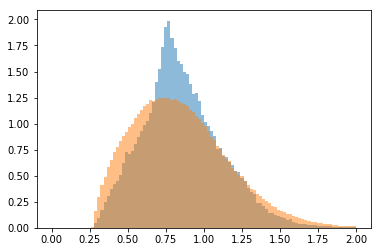

In [6]:
fig = plt.figure( figsize=(20, 10))
plt.subplot(2,3,1)
plt.hist(df['Nu'], bins=25,range =(2,5), histtype='step', normed=True,label='Data')
#plt.hist(MC_reco['Nu'], bins=25,range = (2,5),  normed = True,alpha=0.2,label='MC')
plt.legend()
plt.xlabel("Nu [GeV]", fontsize=20)

plt.subplot(2,3,2)
plt.hist(df['Q2'], bins=25,range =(1,5), histtype='step', normed=True,label='Data')
#plt.hist(MC_reco['Q2'], bins=25,range = (1,5),  normed = True,alpha=0.2,label='MC')
plt.xlabel("$Q^{2} [GeV^{2}]$", fontsize=20)

plt.subplot(2,3,3)
plt.hist(data['W'], bins=25,range =(1,3), histtype='step', normed=True,label='Data')
plt.hist(MC_reco['W'], bins=25,range = (1,3), normed = True,alpha=0.2,label='MC')
plt.xlabel("$W$ [GeV]", fontsize=20)

plt.subplot(2,3,4)
plt.hist(data['Xb'], bins=25,range =(0,1), histtype='step', normed=True,label='Data')
plt.hist(MC_reco['Xb'], bins=25,range = (0,1),  normed = True,alpha=0.2,label='MC')
plt.xlabel("$x$", fontsize=20)

plt.subplot(2,3,5)
plt.hist(data['SectorEl'], bins = 12, range = (-0.5,5.5),histtype='step', normed=True,label='Data')
plt.hist(MC_reco['SectorEl'], bins = 12, range=(-0.5,5.5), normed = True,alpha=0.2,label='MC')
plt.xlabel('Sector El')


plt.subplot(2,3,6)
plt.hist(data['deltaZ'], bins = 100, range=(-50,50), histtype='step', normed=True,label='Data')
plt.hist(MC_reco['deltaZ'], bins = 100, range=(-50,50), normed = True,alpha=0.2,label='MC')
plt.xlabel('Delta z')
plt.show()

## Hadron Variables

In [ ]:
fig = plt.figure( figsize=(12, 12))
plt.subplot(3,3,1)
plt.hist(data['Xf'], bins=25,range=(-2,2), histtype='step', normed=True,label='Data')
plt.hist(MC_reco['Xf'], bins=25, range=(-2,2), normed = True,alpha=0.2,label='MC')
plt.legend(loc='best', frameon=False)
plt.xlabel("$X_{\mathrm{f}}$", fontsize=14)


plt.subplot(3,3,2)
plt.hist(data['Zh'], bins=25,range =(0,2), histtype='step', normed=True,label='Data')
plt.hist(MC_reco['Zh'], bins=25,range = (0,2),  normed = True,alpha=0.2,label='MC')
plt.xlabel("$z_{\mathrm{h}}$", fontsize=14)

plt.subplot(3,3,3)
plt.hist(data['Pt'], bins=25,range =(0,2), histtype='step', normed=True,label='Data')
plt.hist(MC_reco['Pt'], bins=25,range = (0,2), normed = True,alpha=0.2,label='MC')
plt.xlabel("$p_{\mathrm{T}}$ [GeV]", fontsize=14)

plt.subplot(3,3,4)
plt.hist(data['PhiPQ'], bins=25, histtype='step', normed=True,label='Data')
plt.hist(MC_reco['PhiPQ'], bins=25,normed = True,alpha=0.2,label='MC')
plt.xlabel("$\phi_{pq}$ [\circ]", fontsize=14)

plt.subplot(3,3,5)
plt.hist(data['ThetaPQ'], bins = 32,histtype='step', normed=True,label='Data')
plt.hist(MC_reco['ThetaPQ'], bins= 32, normed = True,alpha=0.2,label='MC')
plt.xlabel("$theta_{pq}$ ", fontsize=14)

plt.subplot(3,3,6)
plt.hist(data['E'], range=(0,5), bins = 20,histtype='step', normed=True,label='Data')
plt.hist(MC_reco['E'], range=(0,5),bins = 20, normed = True,alpha=0.2,label='MC')
plt.xlabel("E [GeV]", fontsize=14)

plt.subplot(3,3,7)
plt.hist(data['Pl'], range=(-2,2),bins = 32,histtype='step', normed=True,label='Data')
plt.hist(MC_reco['Pl'], range=(-2,2), bins = 32, normed = True,alpha=0.2,label='MC')
plt.xlabel("$P_{L}$ [GeV]", fontsize=14)

plt.subplot(3,3,8)
plt.hist(data['y'], range=(-6,2), bins = 50,histtype='step', normed=True,label='Data')
plt.hist(MC_reco['y'], range=(-6,2), bins = 50, normed = True,alpha=0.2,label='MC')
plt.xlabel("rapidity", fontsize=14)
#plt.yscale('log')

plt.show()

## Dihadron variables

## 2D Distributions

In [ ]:
fig = plt.figure( figsize=(12, 12))
plt.subplot(3,3,1)
plt.hexbin(data['Pt'],data['Zh'],bins='log',cmap='viridis')
plt.xlabel("$p_{\mathrm{T}}$ [GeV]", fontsize=14)
plt.ylabel("$z_{\mathrm{h}}$ ", fontsize=14)

plt.subplot(3,3,2)
plt.hexbin(data['Q2'],data['Xb'],gridsize=50, bins='log',cmap='viridis')
plt.xlabel("$Q^{2} [GeV^{2}]$", fontsize=14)
plt.ylabel("$X_{b}$", fontsize=14)

plt.subplot(3,3,3)
plt.hexbin(data['Q2'],data['Nu'],gridsize=50,bins='log',cmap='viridis')
plt.xlabel("$Q^{2} [GeV^{2}]$", fontsize=14)
plt.ylabel("$Nu$ ", fontsize=14)

plt.subplot(3,3,4)
plt.hexbin(data.query('Zh<1.0')['PhiPQ'],data.query('Zh<1.0')['Zh'],bins='log',cmap='viridis')
plt.xlabel("$\phi_{pq}$ [\circ]", fontsize=14)
plt.ylabel("$z_{\mathrm{h}}$ ", fontsize=14)

plt.subplot(3,3,5)
plt.hexbin(data.query('Pt<1.5')['PhiPQ'],data.query('Pt<1.5')['Pt'],bins='log',cmap='viridis')
plt.xlabel("$\phi_{pq}$ [\circ]", fontsize=20)
plt.ylabel("$p_{\mathrm{T}}$ [GeV]", fontsize=20)

plt.subplot(3,3,6)
plt.hexbin(data.query('Zh<1.0 and Xf>-1.0')['Xf'],data.query('Zh<1.0 and Xf>-1.0')['Zh'],bins='log',cmap='viridis')
plt.xlabel("X_{F}", fontsize=14)
plt.ylabel("$z_{\mathrm{h}}$ ", fontsize=14)

plt.subplot(3,3,7)
plt.hexbin(data.query('Zh<1.0 and y>-4')['y'],data.query('Zh<1.0 and y>-4')['Zh'],bins='log',cmap='viridis')
plt.xlabel("Rapidity", fontsize=14)
plt.ylabel("$z_{\mathrm{h}}$ ", fontsize=14)

plt.subplot(3,3,8)
plt.hexbin(data.query('abs(Xf)<1.0 and y>-4')['y'],data.query('abs(Xf)<1.0 and y>-4')['Xf'],bins='log',cmap='viridis')
plt.xlabel("Rapidity", fontsize=14)
plt.ylabel("X_{F}", fontsize=14)


plt.show()